In [1]:
# Importing the necessary libraries
import os
import cv2
import imghdr
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
from tensorflow.keras.applications import EfficientNetB0

In [2]:
data_dir = 'Data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [3]:
# Remove images with unsupported extensions
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [4]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 1557 files belonging to 10 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = next(data_iterator)

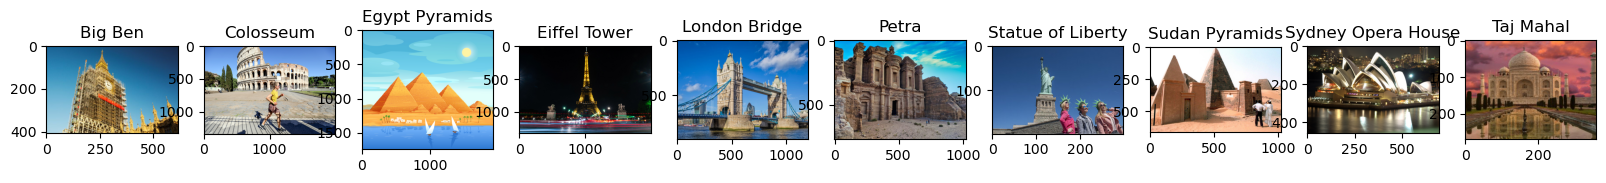

In [7]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
class_names = data.class_names
for idx, folder in enumerate(class_names):
    folder_path = os.path.join(data_dir, folder)
    image_files = os.listdir(folder_path)
    image_path = os.path.join(folder_path, image_files[0])  
    img = plt.imread(image_path)
    ax[idx].imshow(img)
    ax[idx].set_title(folder)

In [8]:
# Defining data augmentation transformations
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
])

In [9]:
data = data.map(lambda x, y: (x / 255, y))

In [10]:
# Splitting the dataset into training and validation
train_size = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 160),
    batch_size=160)
val_size = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

Found 1557 files belonging to 10 classes.
Using 1246 files for training.
Found 1557 files belonging to 10 classes.
Using 311 files for validation.


In [11]:
# Applying data augmentation to the training dataset
train_size = train_size.map(lambda x, y: (data_augmentation(x, training=True), y))

In [12]:
# Assigning Test dataset
test_dataset = val_size.take(5)
val_size = val_size.skip(5)

In [13]:
# Pre-trained EfficientNetB0 model
base_model = EfficientNetB0(include_top=False, input_shape=(160, 160, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_size, epochs=100, validation_data=val_size)


16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/100
8/8 [==============================] - 33s 2s/step - loss: 2.0050 - accuracy: 0.5417 - val_loss: 0.4543 - val_accuracy: 0.8675
Epoch 2/100
8/8 [==============================] - 26s 2s/step - loss: 0.5115 - accuracy: 0.8451 - val_loss: 0.2930 - val_accuracy: 0.9073
Epoch 3/100
8/8 [==============================] - 25s 2s/step - loss: 0.3038 - accuracy: 0.9085 - val_loss: 0.2372 - val_accuracy: 0.9205
Epoch 4/100
8/8 [==============================] - 25s 2s/step - loss: 0.2130 - accuracy: 0.9374 - val_loss: 0.3694 - val_accuracy: 0.8940
Epoch 5/100
8/8 [==============================] - 26s 2s/step - loss: 0.1625 - accuracy: 0.9478 - val_loss: 0.4065 - val_accuracy: 0.8874
Epoch 6/100
8/8 [==============================] - 26s 2s/step - loss: 0.1000 - accuracy: 0.9695 - val_loss: 0.1744 - val_accuracy: 0.9470
Epoch 7/100
8/8 [==============================] - 25s 2s/step - loss: 0.0934 - accuracy: 0.9727 - va

8/8 [==============================] - 22s 2s/step - loss: 0.0405 - accuracy: 0.9864 - val_loss: 0.3669 - val_accuracy: 0.9536
Epoch 59/100
8/8 [==============================] - 22s 2s/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.4766 - val_accuracy: 0.9272
Epoch 60/100
8/8 [==============================] - 22s 2s/step - loss: 0.0330 - accuracy: 0.9904 - val_loss: 0.2405 - val_accuracy: 0.9536
Epoch 61/100
8/8 [==============================] - 22s 2s/step - loss: 0.0424 - accuracy: 0.9880 - val_loss: 0.0888 - val_accuracy: 0.9735
Epoch 62/100
8/8 [==============================] - 22s 2s/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.2305 - val_accuracy: 0.9470
Epoch 63/100
8/8 [==============================] - 22s 2s/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.1651 - val_accuracy: 0.9669
Epoch 64/100
8/8 [==============================] - 23s 2s/step - loss: 0.0714 - accuracy: 0.9823 - val_loss: 0.3758 - val_accuracy: 0.9470
Epoch 65/100
8/8 [===============

In [14]:
# Getting the true labels and the predicted labels of test data
y_true = []
y_pred = []
for images, labels in test_dataset:
  predictions = model.predict(images)
  y_true.extend(labels.numpy())
  y_pred.extend(np.argmax(predictions, axis=1))

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 [==============================] - 0s 356ms/step
                    precision    recall  f1-score   support

           Big Ben       0.94      0.94      0.94        16
         Colosseum       0.83      0.91      0.87        11
    Egypt Pyramids       0.89      1.00      0.94        16
      Eiffel Tower       0.94      1.00      0.97        15
     London Bridge       1.00      0.68      0.81        19
             Petra       1.00      1.00      1.00        20
 Statue of Liberty       0.70      1.00      0.82         7
    Sudan Pyramids       0.95      0.88      0.91        24
Sydney Opera House       1.00      0.95      0.97        19
         Taj Mahal       0.80      0.92      0.86        13

          accuracy                           0.92       160
         macro avg       0.91      0.93      0.91       160
      weighted avg       0.93      0.92      0.92       160



<Figure size 2000x1000 with 0 Axes>

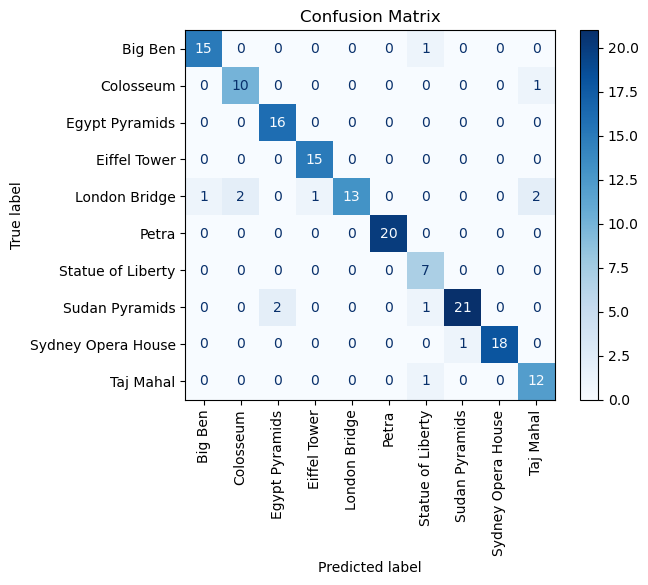

In [15]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix 
plt.figure(dpi=200, figsize=(10, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 357ms/step


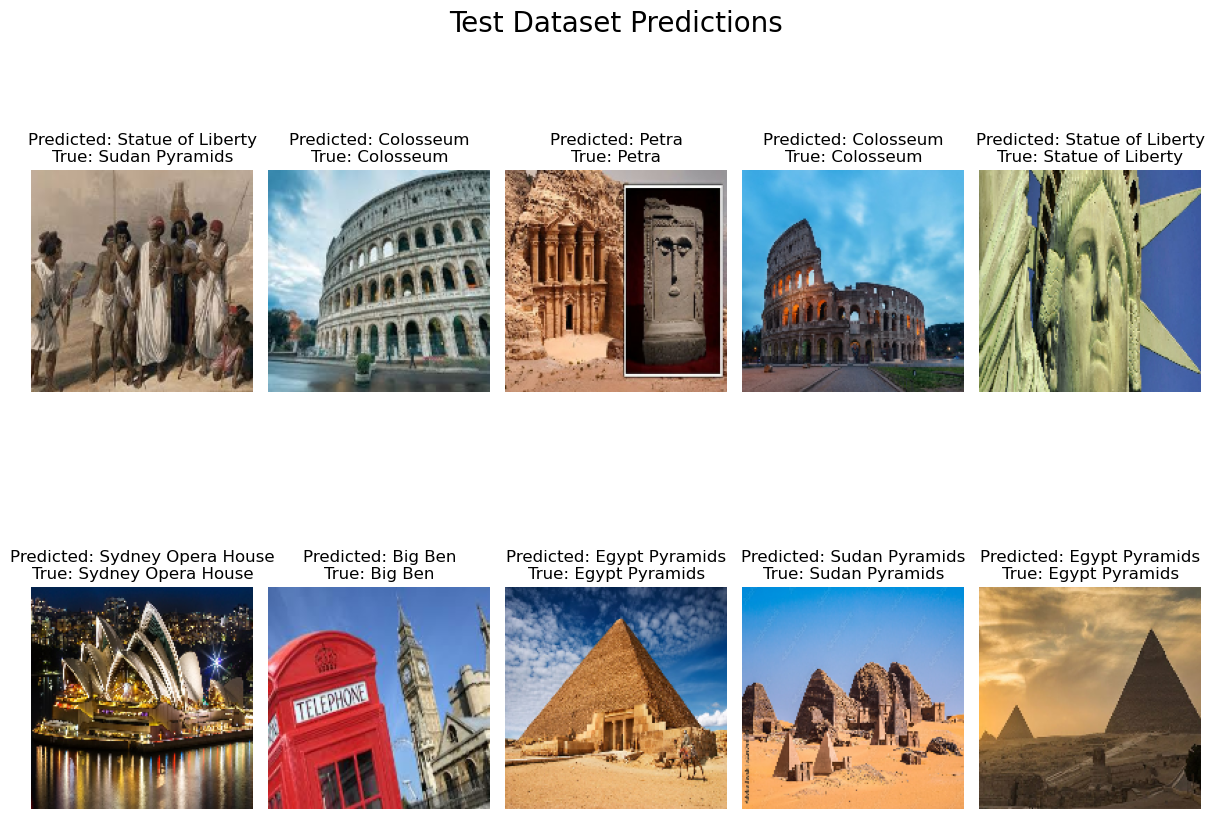

In [16]:
# Getting a batch of images from the test dataset
sample_images, sample_labels = next(iter(test_dataset))
sample_predictions = model.predict(sample_images)

# Mapping the predicted labels to class names
predicted_labels = [class_names[np.argmax(prediction)] for prediction in sample_predictions]

# Creating a figure with a grid of subplots for visualization
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))

# Loop through the subplots
for i in range(2):
    for j in range(5):
        idx = i * 5 + j  
        
        # Preprocess and normalize the image
        image = sample_images[idx] / 255.0
        ax[i, j].set_title(f"Predicted: {predicted_labels[idx]}\nTrue: {class_names[sample_labels[idx]]}")
        ax[i, j].imshow(image)
        ax[i, j].axis("off")

# Increase the resolution of the images
plt.rcParams["figure.dpi"] = 300

# Display the images
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()
